

---

Image Classification Using a Neural Network


---

**Assignment:**

Create an image classification model using a neural network model to classify images of clothing from the Fashion MNIST dataset directly from TensorFlow.

* **Important Notes:**

   * Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" machine learning program for computer vision.
   * The dataset is relatively small and used to verify that an algorithm works as expected.
   * It is a starting point to test and debug code in image classification applications.
   * It has 60,000 images to train the network and 10,000 to evaluate how accurately it learned to classify images.
   * You can access the Fashion MNIST directly from TensorFlow.
   * Make sure to submit your Jupyter Notebook, which includes all the related codes.
   * Add enough comments and markdowns to guide the reviewer in all the steps you followed.


**import/install required libraries**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
! pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 1.7 MB 71.1 MB/s 
     |████████████████████████████████| 5.9 MB 58.3 MB/s 
     |████████████████████████████████| 438 kB 60.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [3]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install imageio
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Note: 'AttributeError: module 'tensorflow_core.keras.layers' has no attribute 'experimental''
#! pip install tensorflow --upgrade

from tensorflow import keras
from tensorflow.keras import layers  

In [5]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


**cheeck out the version**

In [7]:
print(tf.__version__)

2.9.2


In [8]:
?Sequential

**Import the Fashion MNIST dataset**

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**The labels are number ranging from 0 to 9. These the class of clothing the image represents**

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

**Explore the data**

In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


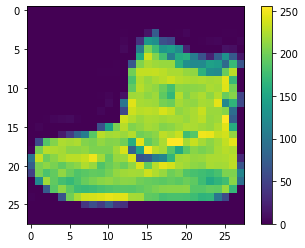

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

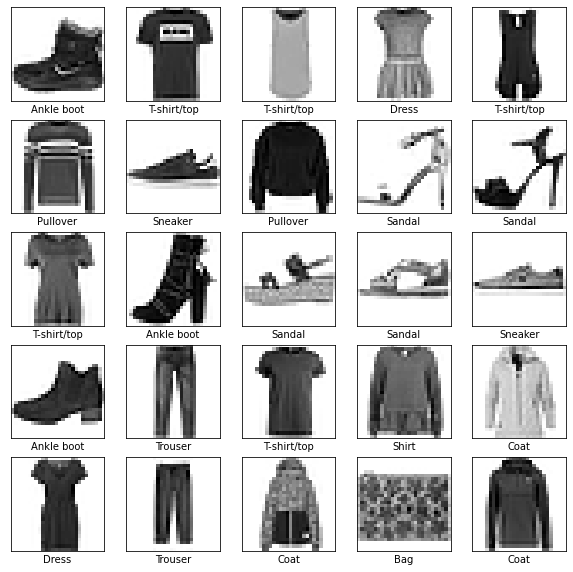

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Preprocess the data**

**Normalizing**

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Reshaping the Image**

In [16]:
# redimensionar as imagens
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

print("train_images: ", train_images.shape)
print("test_images:  ", test_images.shape)

train_images:  (60000, 28, 28, 1)
test_images:   (10000, 28, 28, 1)


# **Building the model**

In [19]:
model= keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

**Compile the model**

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

save the results of our training in the variable history

In [21]:
# Fit Model 
with tf.device('/GPU:0'):
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  


1875/1875 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.8225

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 145s 77ms/step - loss: 0.4939 - accuracy: 0.8225 - val_loss: 0.3233 - val_accuracy: 0.8832
Epoch 2/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.3117 - accuracy: 0.8873 - val_loss: 0.2859 - val_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.2638 - accuracy: 0.9049 - val_loss: 0.2458 - val_accuracy: 0.9101
Epoch 4/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2275 - accuracy: 0.9176 - val_loss: 0.2410 - val_accuracy: 0.9137
Epoch 5/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0

In [23]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
history.history

{'loss': [0.4938771426677704,
  0.3117333650588989,
  0.26376426219940186,
  0.2274501472711563,
  0.20537947118282318,
  0.18315842747688293,
  0.16678917407989502,
  0.1516970992088318,
  0.13578921556472778,
  0.12768477201461792],
 'accuracy': [0.8225333094596863,
  0.8873166441917419,
  0.9048500061035156,
  0.9175666570663452,
  0.924833357334137,
  0.9326333403587341,
  0.9399833083152771,
  0.9447000026702881,
  0.9500499963760376,
  0.9527333378791809],
 'val_loss': [0.323257178068161,
  0.2858823239803314,
  0.24583745002746582,
  0.24095502495765686,
  0.25021612644195557,
  0.25501489639282227,
  0.24175547063350677,
  0.2432665228843689,
  0.253264844417572,
  0.2660408318042755],
 'val_accuracy': [0.8831999897956848,
  0.8981000185012817,
  0.910099983215332,
  0.9136999845504761,
  0.9153000116348267,
  0.9160000085830688,
  0.9200000166893005,
  0.9218000173568726,
  0.920799970626831,
  0.9211000204086304]}

# **Evaluating the model**

In [24]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 7s - loss: 0.2660 - accuracy: 0.9211 - 7s/epoch - 24ms/step


**Loss**

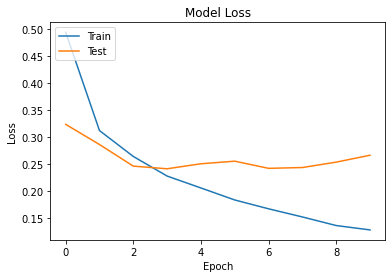

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

**Accruracy**

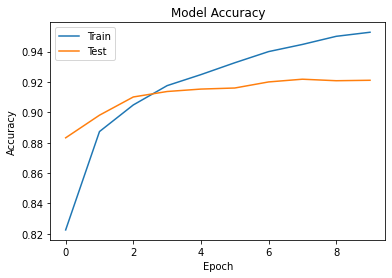

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

# **Make predictions**

In [28]:
# predictions are probability distributions between 0 and 1 (because of softmax)
pred = model.predict(test_images)

pred

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 7s 20ms/step


array([[3.2675653e-18, 1.1364731e-13, 1.1720152e-15, ..., 9.6858798e-07,
        3.8600062e-15, 9.9999899e-01],
       [2.2900761e-09, 6.5378688e-17, 9.9999923e-01, ..., 2.8714146e-23,
        1.2469664e-15, 7.5886137e-22],
       [9.7878873e-25, 9.9999994e-01, 4.6396949e-23, ..., 3.1037496e-36,
        1.5535570e-24, 8.1541597e-33],
       ...,
       [1.7534391e-18, 2.5244520e-25, 6.3399529e-28, ..., 5.5271720e-27,
        9.9999994e-01, 2.4348422e-28],
       [7.5273604e-20, 9.9999994e-01, 5.4424549e-20, ..., 1.3271531e-28,
        4.8909212e-20, 4.1436598e-26],
       [2.0734350e-04, 1.0982004e-05, 3.6616261e-06, ..., 5.6450918e-02,
        1.3642830e-03, 4.1270726e-03]], dtype=float32)

In [29]:
# So we need to find which is the max
# for this we can use argmax function from numpy
print(pred[0])
# it gives an index of maximum value
np.argmax(pred[0])

[3.2675653e-18 1.1364731e-13 1.1720152e-15 6.0671758e-12 1.1845060e-15
 6.5457517e-10 8.1750944e-15 9.6858798e-07 3.8600062e-15 9.9999899e-01]


9

In [30]:
# we can convert predictions into labels by computing argmax for each 
pred_classes = [np.argmax(element) for element in pred]
pred_classes

[9,
 2,
 1,
 1,
 6,
 1,
 2,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 6,
 2,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,


In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 7s 21ms/step


In [43]:
predictions[0]

array([0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675,
       0.08533675, 0.08533675, 0.08533683, 0.08533675, 0.2319691 ],
      dtype=float32)

In [44]:
test_labels[0]

9

# **Classification Report**

In [50]:
# compare true vs prediced
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.94      0.93      1000
           4       0.87      0.88      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.79      0.74      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

